In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt 


C:\Users\deivi\AppData\Local\Temp\ipykernel_106812\1536995000.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [1]:
import pandas as pd

data = pd.read_csv(r"C:\Users\deivi\Downloads\sp500_data.csv")
data.head()


C:\Users\deivi\AppData\Local\Temp\ipykernel_121484\2898111655.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
1,2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2,2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
3,2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
4,2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000


In [2]:
summary_stats = data.describe()
missing_values = data.isnull().sum()
data_types = data.dtypes
data['Date'] = pd.to_datetime(data['Date'])
summary_stats, missing_values, data_types


(              Open         High          Low        Close    Adj Close  \
 count  6037.000000  6037.000000  6037.000000  6037.000000  6037.000000   
 mean   1973.302234  1984.955333  1960.794329  1973.586551  1973.586551   
 std    1061.063967  1066.402460  1055.531844  1061.335875  1061.335875   
 min     679.280029   695.270020   666.789978   676.530029   676.530029   
 25%    1191.369995  1198.739990  1184.359985  1191.380005  1191.380005   
 50%    1457.150024  1465.709961  1448.359985  1457.339966  1457.339966   
 75%    2581.929932  2596.270020  2572.149902  2584.840088  2584.840088   
 max    4804.509766  4818.620117  4780.979980  4796.560059  4796.560059   
 
              Volume  
 count  6.037000e+03  
 mean   3.327312e+09  
 std    1.509315e+09  
 min    3.560700e+08  
 25%    2.093720e+09  
 50%    3.442920e+09  
 75%    4.159760e+09  
 max    1.145623e+10  ,
 Date         0
 Open         0
 High         0
 Low          0
 Close        0
 Adj Close    0
 Volume       0
 dt

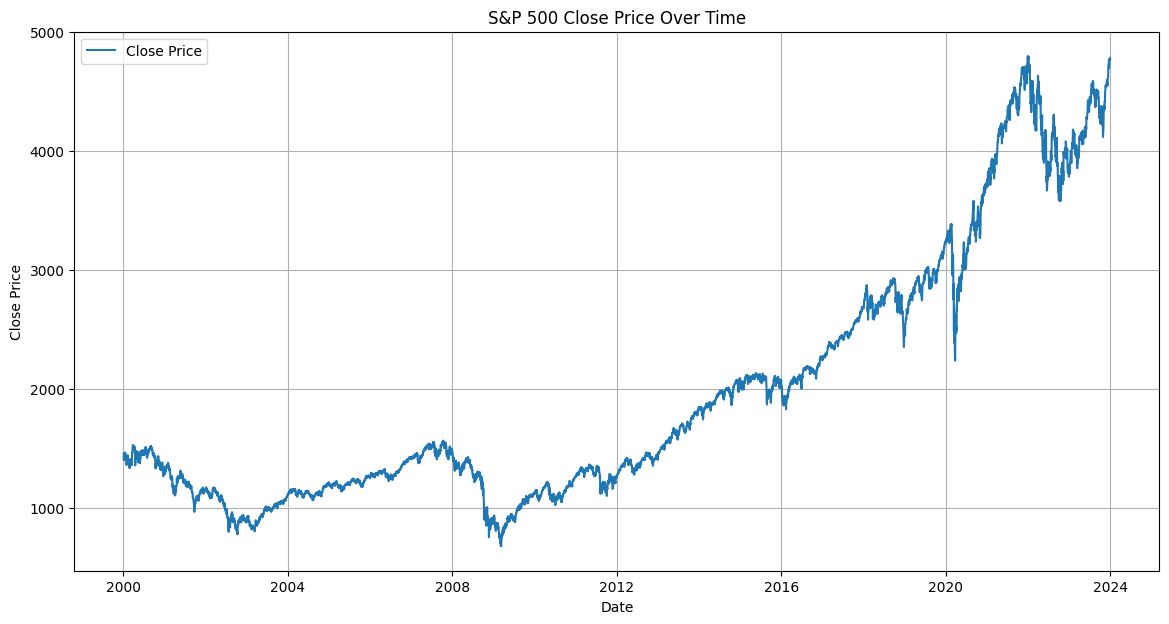

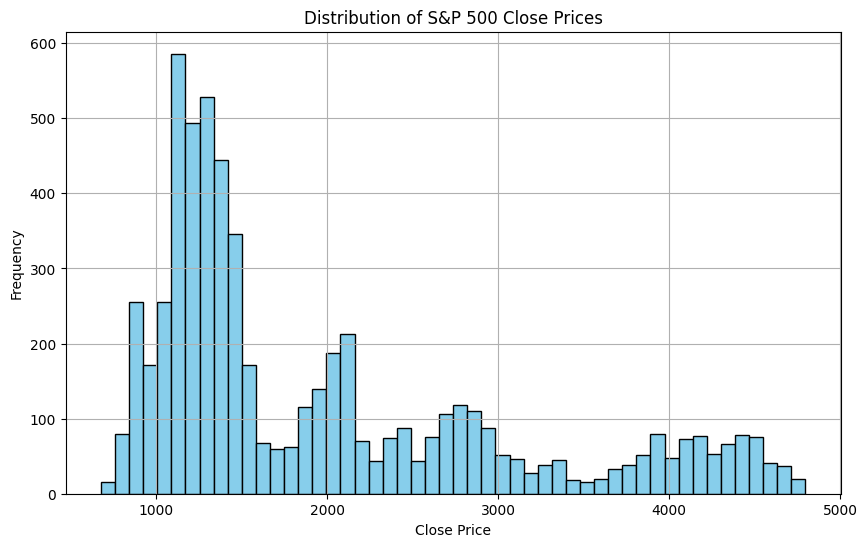

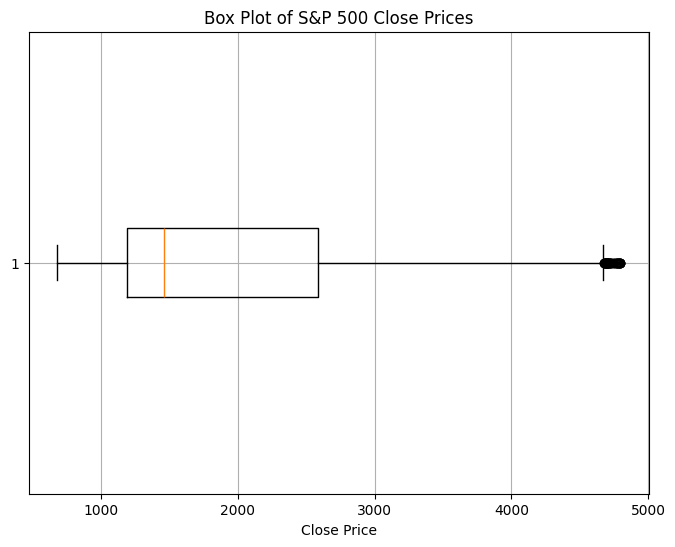

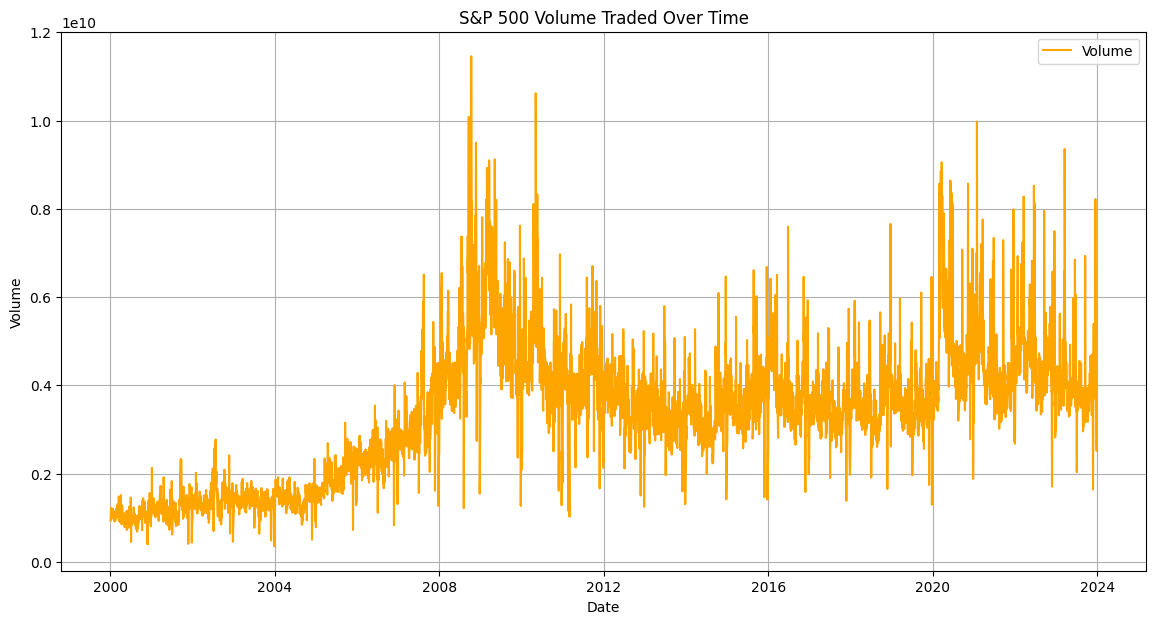

In [3]:
import matplotlib.pyplot as plt


plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('S&P 500 Close Price Over Time')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.hist(data['Close'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.title('Distribution of S&P 500 Close Prices')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.boxplot(data['Close'], vert=False)
plt.xlabel('Close Price')
plt.title('Box Plot of S&P 500 Close Prices')
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Volume'], label='Volume', color='orange')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('S&P 500 Volume Traded Over Time')
plt.legend()
plt.grid(True)
plt.show()


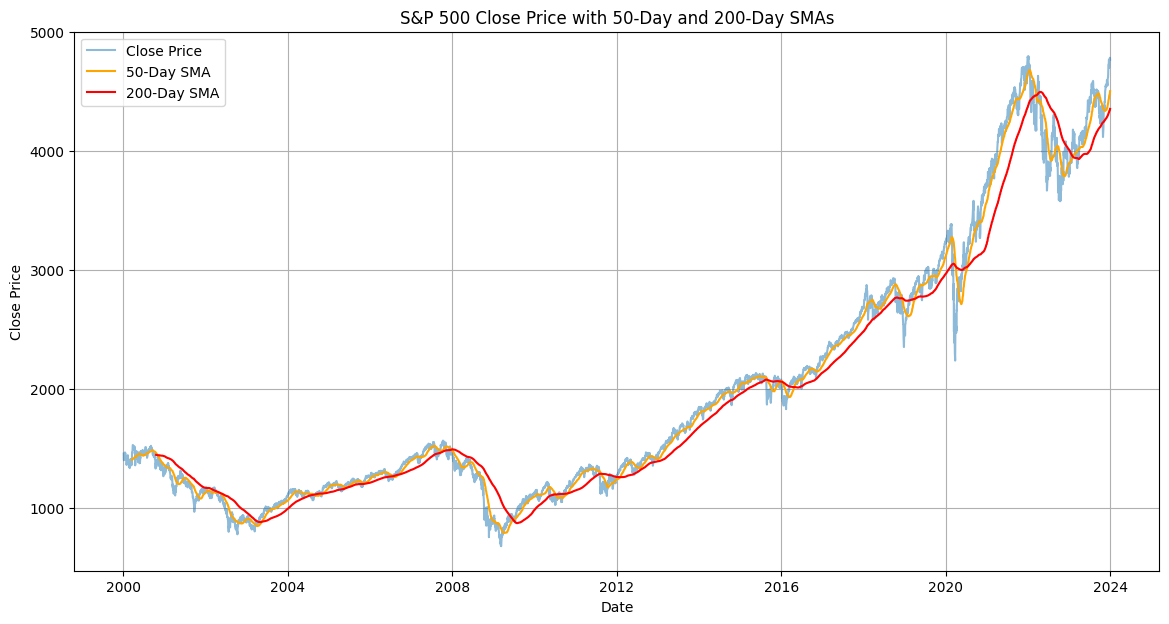

In [4]:

data['SMA50'] = data['Close'].rolling(window=50).mean()
data['SMA200'] = data['Close'].rolling(window=200).mean()

plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Close Price', alpha=0.5)
plt.plot(data['Date'], data['SMA50'], label='50-Day SMA', color='orange')
plt.plot(data['Date'], data['SMA200'], label='200-Day SMA', color='red')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('S&P 500 Close Price with 50-Day and 200-Day SMAs')
plt.legend()
plt.grid(True)
plt.show()


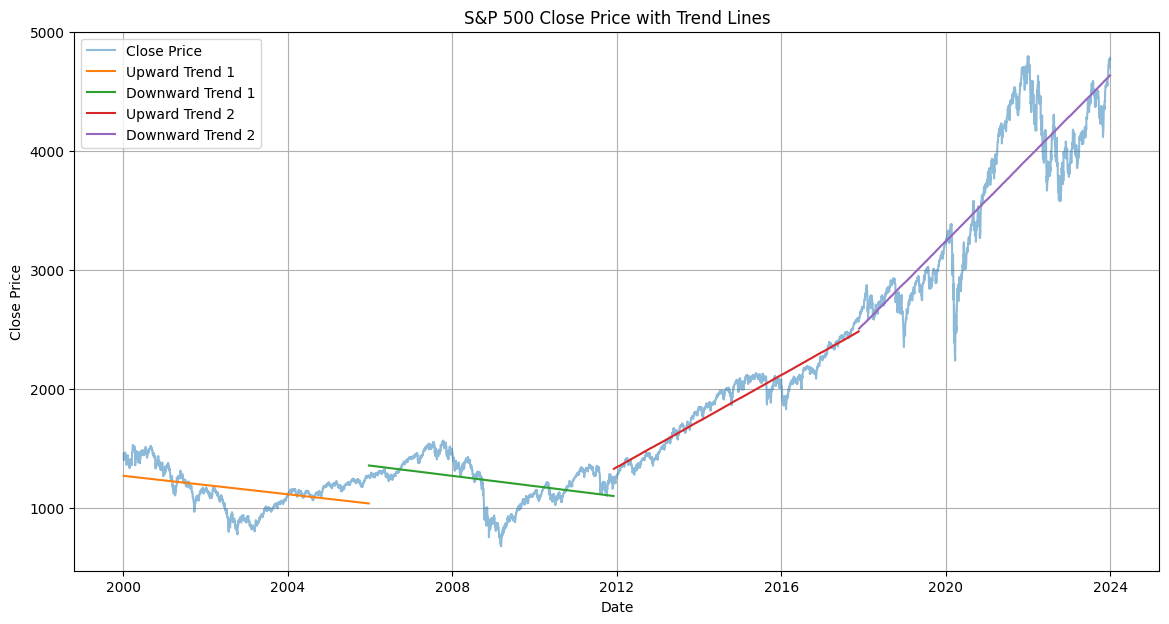

In [5]:
import numpy as np
from sklearn.linear_model import LinearRegression

def plot_trend_lines(data, start_idx, end_idx, label):
    X = np.array(range(start_idx, end_idx)).reshape(-1, 1)
    y = data['Close'][start_idx:end_idx].values
    model = LinearRegression().fit(X, y)
    trend = model.predict(X)
    plt.plot(data['Date'][start_idx:end_idx], trend, label=label)

plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Close Price', alpha=0.5)

plot_trend_lines(data, 0, 1500, 'Upward Trend 1')
plot_trend_lines(data, 1500, 3000, 'Downward Trend 1')
plot_trend_lines(data, 3000, 4500, 'Upward Trend 2')
plot_trend_lines(data, 4500, len(data), 'Downward Trend 2')

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('S&P 500 Close Price with Trend Lines')
plt.legend()
plt.grid(True)
plt.show()


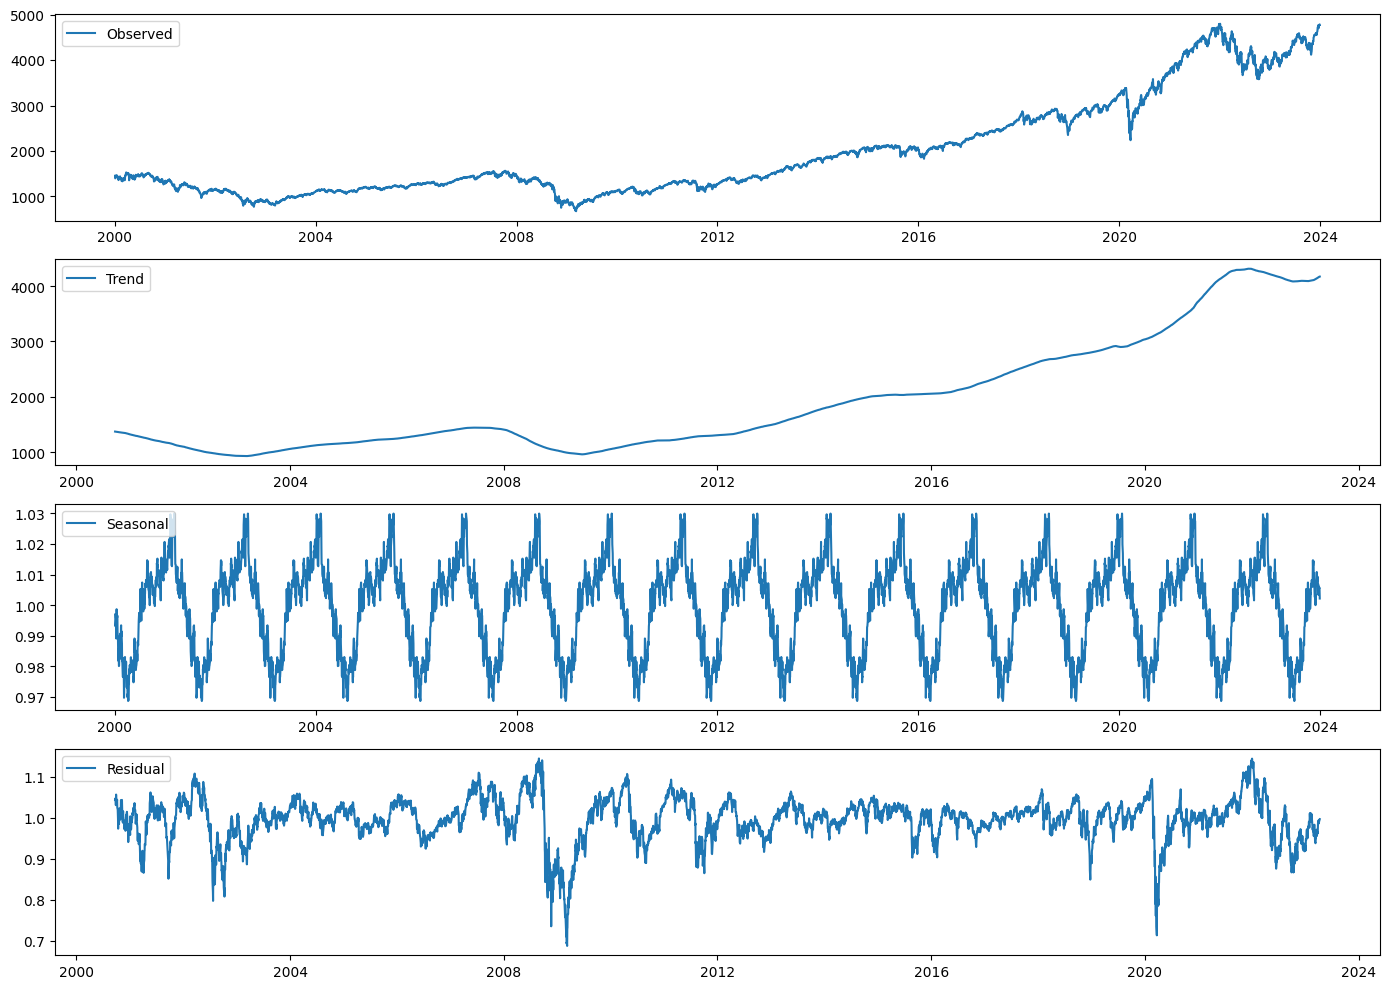

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

data.set_index('Date', inplace=True)
decomposition = seasonal_decompose(data['Close'], model='multiplicative', period=365)

plt.figure(figsize=(14, 10))

plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


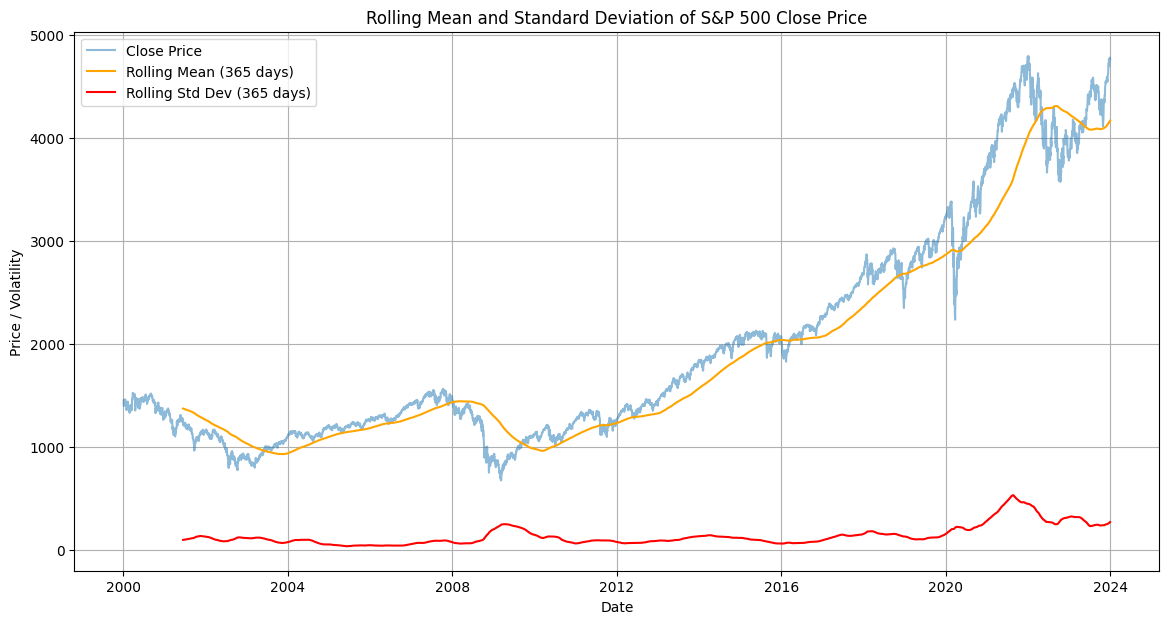

In [7]:
data['Rolling Mean'] = data['Close'].rolling(window=365).mean()
data['Rolling Std'] = data['Close'].rolling(window=365).std()

plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Close Price', alpha=0.5)
plt.plot(data.index, data['Rolling Mean'], label='Rolling Mean (365 days)', color='orange')
plt.plot(data.index, data['Rolling Std'], label='Rolling Std Dev (365 days)', color='red')

plt.xlabel('Date')
plt.ylabel('Price / Volatility')
plt.title('Rolling Mean and Standard Deviation of S&P 500 Close Price')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
from scipy import stats


mean_close = data['Close'].mean()
t_stat, p_val = stats.ttest_1samp(data['Close'], 2000)

mean_close_test = {
    "Mean Close Price": mean_close,
    "T-Statistic": t_stat,
    "P-Value": p_val
}


date_split = pd.Timestamp('2008-01-01')
before_split = data[data.index < date_split]['Close']
after_split = data[data.index >= date_split]['Close']
t_stat_diff, p_val_diff = stats.ttest_ind(before_split, after_split, equal_var=False)

diff_mean_test = {
    "Mean Close Before": before_split.mean(),
    "Mean Close After": after_split.mean(),
    "T-Statistic": t_stat_diff,
    "P-Value": p_val_diff
}

var_close = data['Close'].var()
chi2_stat, p_val_var = stats.chisquare(data['Close'])

variance_test = {
    "Variance Close Price": var_close,
    "Chi-Square Statistic": chi2_stat,
    "P-Value": p_val_var
}

corr_coef, p_val_corr = stats.pearsonr(data['Close'], data['Volume'])

correlation_test = {
    "Correlation Coefficient": corr_coef,
    "P-Value": p_val_corr
}

std_before = before_split.std()
std_after = after_split.std()
f_stat, p_val_f = stats.f_oneway(before_split, after_split)

volatility_test = {
    "Standard Deviation Before": std_before,
    "Standard Deviation After": std_after,
    "F-Statistic": f_stat,
    "P-Value": p_val_f
}

(mean_close_test, diff_mean_test, variance_test, correlation_test, volatility_test)


({'Mean Close Price': 1973.5865510160488,
  'T-Statistic': -1.9336722156994146,
  'P-Value': 0.05320014014850386},
 {'Mean Close Before': 1213.1191693509988,
  'Mean Close After': 2353.1592942856664,
  'T-Statistic': -63.248417798200556,
  'P-Value': 0.0},
 {'Variance Close Price': 1126433.8405954577,
  'Chi-Square Statistic': 3445075.493818003,
  'P-Value': 0.0},
 {'Correlation Coefficient': 0.34316023645204,
  'P-Value': 1.9280278443062217e-166},
 {'Standard Deviation Before': 186.5731680049599,
  'Standard Deviation After': 1112.926575113829,
  'F-Statistic': 2079.7878406724494,
  'P-Value': 0.0})

In [10]:
# Shapiro-Wilk Test
shapiro_stat, shapiro_p_val = stats.shapiro(data['Close'])

# Kolmogorov-Smirnov Test
ks_stat, ks_p_val = stats.kstest(data['Close'], 'norm', args=(data['Close'].mean(), data['Close'].std()))

# Anderson-Darling Test
anderson_result = stats.anderson(data['Close'], dist='norm')
normality_tests = {
    "Shapiro-Wilk Test": {"Statistic": shapiro_stat, "P-Value": shapiro_p_val},
    "Kolmogorov-Smirnov Test": {"Statistic": ks_stat, "P-Value": ks_p_val},
    "Anderson-Darling Test": {"Statistic": anderson_result.statistic, "Critical Values": anderson_result.critical_values, "Significance Levels": anderson_result.significance_level}
}

normality_tests


C:\Users\deivi\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6037.
  res = hypotest_fun_out(*samples, **kwds)


{'Shapiro-Wilk Test': {'Statistic': 0.8374478214780698,
  'P-Value': 1.6350079500061823e-61},
 'Kolmogorov-Smirnov Test': {'Statistic': 0.20501863609396365,
  'P-Value': 5.464608702798413e-223},
 'Anderson-Darling Test': {'Statistic': 367.6887402202656,
  'Critical Values': array([0.576, 0.656, 0.786, 0.917, 1.091]),
  'Significance Levels': array([15. , 10. ,  5. ,  2.5,  1. ])}}

In [22]:
from statsmodels.tsa.stattools import adfuller, kpss

# Augmented Dickey-Fuller Test
adf_result = adfuller(data['Close'])
adf_test = {
    "ADF Statistic": adf_result[0],
    "P-Value": adf_result[1],
    "Critical Values": adf_result[4]
}

# Kwiatkowski-Phillips-Schmidt-Shin 
kpss_result = kpss(data['Close'], regression='c')
kpss_test = {
    "KPSS Statistic": kpss_result[0],
    "P-Value": kpss_result[1],
    "Critical Values": kpss_result[3]
}

(adf_test, kpss_test)


C:\Users\deivi\AppData\Local\Temp\ipykernel_121484\412410639.py:12: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(data['Close'], regression='c')


({'ADF Statistic': 1.5435305158227937,
  'P-Value': 0.9976778735039675,
  'Critical Values': {'1%': -3.43143962325222,
   '5%': -2.862021513375629,
   '10%': -2.567026307104391}},
 {'KPSS Statistic': 10.501663424827369,
  'P-Value': 0.01,
  'Critical Values': {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}})

In [23]:

data['Close_Diff'] = data['Close'].diff().dropna()

adf_result_diff = adfuller(data['Close_Diff'].dropna())
adf_test_diff = {
    "ADF Statistic": adf_result_diff[0],
    "P-Value": adf_result_diff[1],
    "Critical Values": adf_result_diff[4]
}

kpss_result_diff = kpss(data['Close_Diff'].dropna(), regression='c')
kpss_test_diff = {
    "KPSS Statistic": kpss_result_diff[0],
    "P-Value": kpss_result_diff[1],
    "Critical Values": kpss_result_diff[3]
}

(adf_test_diff, kpss_test_diff)


({'ADF Statistic': -15.43036936360145,
  'P-Value': 2.9539685004421383e-28,
  'Critical Values': {'1%': -3.43143962325222,
   '5%': -2.862021513375629,
   '10%': -2.567026307104391}},
 {'KPSS Statistic': 0.5121684238691135,
  'P-Value': 0.038926030660109565,
  'Critical Values': {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}})

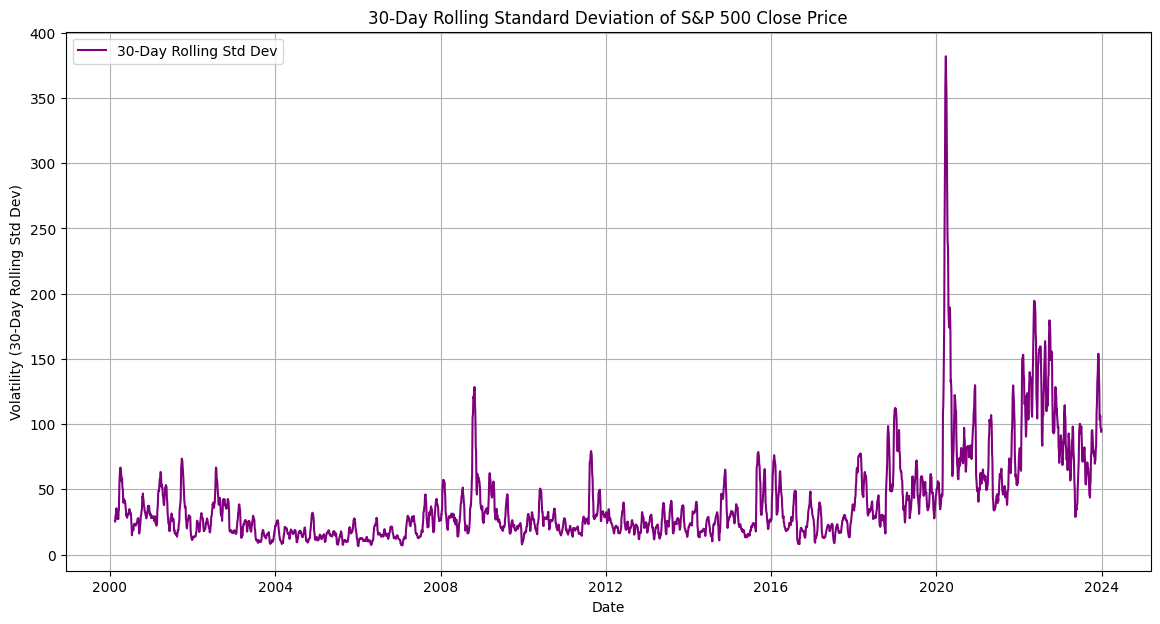

In [13]:
data['Rolling_Std_30'] = data['Close'].rolling(window=30).std()
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Rolling_Std_30'], label='30-Day Rolling Std Dev', color='purple')
plt.xlabel('Date')
plt.ylabel('Volatility (30-Day Rolling Std Dev)')
plt.title('30-Day Rolling Standard Deviation of S&P 500 Close Price')
plt.legend()
plt.grid(True)
plt.show()


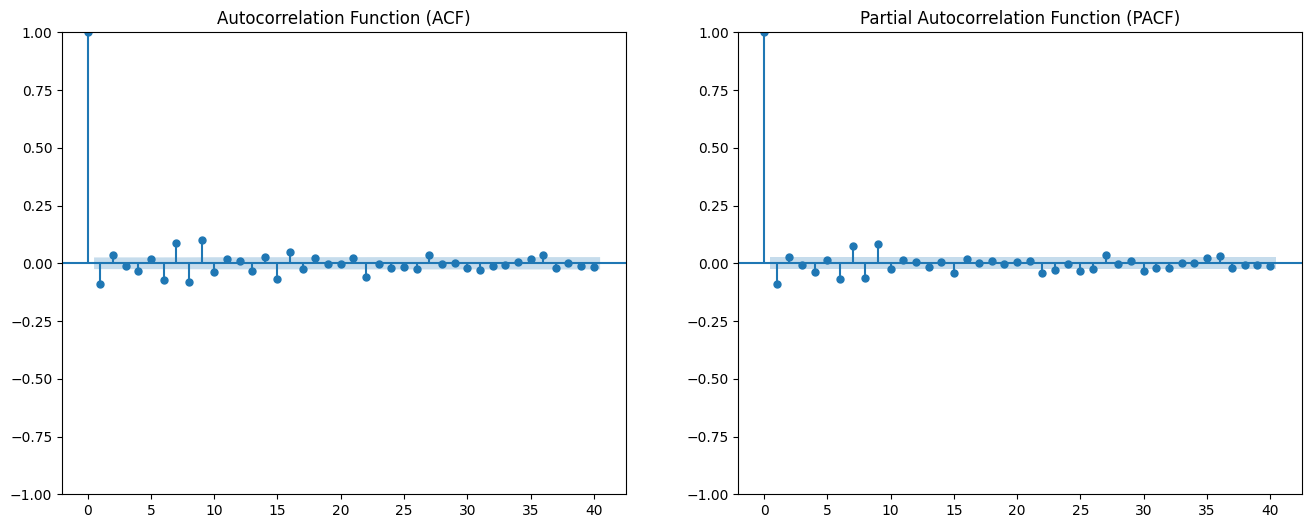

In [14]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(data['Close_Diff'].dropna(), lags=40, ax=axes[0])
plot_pacf(data['Close_Diff'].dropna(), lags=40, ax=axes[1])

axes[0].set_title('Autocorrelation Function (ACF)')
axes[1].set_title('Partial Autocorrelation Function (PACF)')

plt.show()


In [61]:
from statsmodels.tsa.arima.model import ARIMA


model = ARIMA(data['Close'], order=(3, 1, 3))
fit_model = model.fit()

fit_model_summary = fit_model.summary()
fit_model_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 6037
Model:                 ARIMA(3, 1, 3)   Log Likelihood              -27963.942
Date:                Fri, 07 Jun 2024   AIC                          55941.885
Time:                        17:07:22   BIC                          55988.823
Sample:                             0   HQIC                         55958.180
                               - 6037                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7993      0.037    -21.718      0.000      -0.871      -0.727
ar.L2          0.8010      0.061     13.165      0.000       0.682       0.920
ar.L3          0.8490      0.031     27.313      0.000       0.788       0.910
ma.L1          0.7346      0.037     20.035      0.000       0.663       0.806
ma.L2         -0.8274      0.057    -14.512      0.000      -0.939      -0.716
ma.L3         -0.7798      0.028    -27.566      0.000      -0.835      -0.724
sigma2       625.6452      4.709    132.876      0.000     616.417     634.874
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):             42127.26
Prob(Q):                              0.74   Prob(JB):                         0.00
Heteroskedasticity (H):               7.91   Skew:                            -0.82
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [62]:
forecast_steps =365
forecast = fit_model.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='B')
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()


forecast_values.index = forecast_index
forecast_conf_int.index = forecast_index
forecast_values = pd.to_numeric(forecast_values, errors='coerce')
forecast_conf_int = forecast_conf_int.apply(pd.to_numeric, errors='coerce')
forecast_values = forecast_values.dropna()
forecast_conf_int = forecast_conf_int.dropna()
forecast_values.head(), forecast_conf_int.head()

(2024-01-01    4764.087815
 2024-01-02    4768.145901
 2024-01-03    4762.642198
 2024-01-04    4765.416683
 2024-01-05    4762.235742
 Freq: B, Name: predicted_mean, dtype: float64,
             lower Close  upper Close
 2024-01-01  4715.063433  4813.112198
 2024-01-02  4701.019934  4835.271868
 2024-01-03  4680.642114  4844.642282
 2024-01-04  4670.923373  4859.909993
 2024-01-05  4657.413637  4867.057848)

In [38]:
forecast_values.to_csv('forecast_sp50030daS.csv')


In [65]:
!pip install pmdarima

import pmdarima as pm
model = pm.auto_arima(data['Close'], 
                      start_p=0, start_q=0, 
                      max_p=5, max_q=5, 
                      seasonal=False, 
                      stepwise=True, 
                      trace=True)

print(model.summary())
forecast = model.predict(n_periods=3)

  Obtaining dependency information for pmdarima from https://files.pythonhosted.org/packages/ac/f8/6c9364602b13f0dba129b53acd1344859690911a4d5021560d9fd6aa087f/pmdarima-2.0.4-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for Cython!=0.29.18,!=0.29.31,>=0.29 from https://files.pythonhosted.org/packages/18/ec/f47a721071d084d6c2b6783eb8d058b964b1450cb708d920d0d792f42001/Cython-3.0.10-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
    --------------------------------------- 10.2/614.7 kB ? eta -:--:--
   - ------------------------------------- 30.7/614.7 kB 435.7 kB/s eta 0:00:02
   --- ----------------------------------- 61.4/614.7 kB 544.7 kB/s eta 0:00:02
   ------- ------------------------------ 122.9/614.7 kB 798.9 kB/s eta 0:00:01
   ------------------------- -------------- 399.4/614.7 kB 2.1 MB/s eta 0:00:01
   ---------------------------------------- 614.7/614.7 kB 2.8 MB/s eta 0:00:00
   -----------

In [72]:
forecast = model.predict(n_periods=365)
forecast

6037    4780.817252
6038    4785.434919
6039    4790.060663
6040    4792.585232
6041    4793.823718
           ...     
6397    5901.837001
6398    5904.947307
6399    5908.057613
6400    5911.167918
6401    5914.278224
Length: 365, dtype: float64

In [3]:
def gameWinners():
    team1_points = int(input("Enter points scored by Gryffindor's Chasers: "))
    team1_snitch = input("Did Gryffindor catch the golden snitch? (yes/no): ")
    team2_points = int(input("Enter points scored by Slytherin's Chasers: "))
    team2_snitch = input("Did Slytherin catch the golden snitch? (yes/no): ")
    total_points_team1 = team1_points + (150 if team1_snitch == 'yes' else 0)
    total_points_team2 = team2_points + (150 if team2_snitch == 'yes' else 0)

    if total_points_team1 > total_points_team2:
        return 'Gryffindor wins!'
    elif total_points_team1 < total_points_team2:
        return 'Slytherin wins!'
    else:
        return "It's a draw!"
print(gameWinners())



Enter points scored by Gryffindor's Chasers:  70
Did Gryffindor catch the golden snitch? (yes/no):  no
Enter points scored by Slytherin's Chasers:  69
Did Slytherin catch the golden snitch? (yes/no):  yes


Slytherin wins!


(                   Open         High          Low      Volume        SMA50  \
 Date                                                                         
 2001-06-13  1255.849976  1259.750000  1241.589966  1063600000  1239.482397   
 2001-06-14  1241.599976  1241.599976  1218.900024  1242900000  1241.750598   
 2001-06-15  1219.869995  1221.500000  1203.030029  1635550000  1243.972798   
 2001-06-18  1214.359985  1221.229980  1208.329956  1111600000  1245.112600   
 2001-06-19  1208.430054  1226.109985  1207.709961  1184900000  1246.795598   
 
                  SMA200  Rolling Mean  Rolling Std  Close_Diff  \
 Date                                                             
 2001-06-13  1317.746100   1374.592054    99.048177  -14.250000   
 2001-06-14  1316.275000   1373.947259    99.287619  -21.729980   
 2001-06-15  1314.797600   1373.440245    99.629103   -5.510010   
 2001-06-18  1313.326801   1372.909615    99.991104   -5.929932   
 2001-06-19  1311.801300   1372.386684   10

C:\Users\deivi\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


(1193180.1682548213,
 Date
 2019-06-28    2941.760010
 2019-07-01    2964.330078
 2019-07-02    2973.010010
 2019-07-03    2995.820068
 2019-07-05    2990.409912
 Name: Close, dtype: float64,
 array([2934.3638, 2930.2935, 2927.0261, 2930.763 , 2926.1204],
       dtype=float32))